In [12]:
import sys
sys.path.insert(0, '..')

from battleship.agents import CodeSpotterModel
from battleship.agents import DirectSpotterModel
from battleship.agents import CacheMode
from battleship.run_spotter_benchmarks import load_data, benchmark_on_rounds

df, rounds_questions_dict = load_data(
        stages_path="/home/ubuntu/repo_battleship/temp/gold_annotations_partial.csv",
        rounds_path="/home/ubuntu/repo_battleship/battleship/experiments/collaborative/battleship-final-data/round.csv",
        goldAnnotations=["answer", "ambiguous", "contextual", "unanswerable"],
    )

print(len(rounds_questions_dict.keys()))

18


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# We'll store the accuracy results in a dictionary:
# Key: language model string
# Value: list of accuracies [DirectSpotter, CodeSpotterModel]
results = {"language_model":[],"spotter_model":[],"accuracy":[],"cot":[]}
QUESTIONS = 20
ROUNDS = 20

cot_list = [True, False]
spotter_models = [DirectSpotterModel, CodeSpotterModel]
language_models = ["gpt-4o"]

for llm in language_models:
        for spotter in spotter_models:
                for cot_option in cot_list:
                        print(f"Benchmarking {spotter.__name__} with language model {llm}, COT: {cot_option}")
                        accuracy, failed = benchmark_on_rounds(
                                df=df,
                                rounds_question_ids=rounds_questions_dict,
                                model=spotter,
                                model_string=llm,
                                max_rounds=ROUNDS,
                                max_questions=QUESTIONS,
                                cache_mode=CacheMode.WRITE_ONLY,
                                use_cot=cot_option,
                                use_history=True,
                        )
                        results["language_model"].append(llm)
                        results["spotter_model"].append(spotter.__name__)
                        results["cot"].append(cot_option)
                        results["accuracy"].append(accuracy)
                        print(f"Accuracy: {accuracy}")

# Convert the results to a df for easier manipulation
results_df = pd.DataFrame(results)

Benchmarking DirectSpotterModel with language model gpt-4o, COT: True


Round 01JJ7XE7JD29BEKTD8K2YMZW8B, 13/20:  25%|██▌       | 1/4 [00:07<00:23,  7.92s/it]

Error with decision id 15
Error with decision id 17


Round 01JJ8BHRK7THZ5A14XESXTCCJZ, 15/20:   0%|          | 0/4 [00:00<?, ?it/s]

Error with decision id 32


Round 01JJWZGGF9SQ6RKQ80Z1KY7MGA, 16/20:   0%|          | 0/3 [00:00<?, ?it/s]

Error with decision id 1


Round 01JJWZGGF9SQ6RKQ80Z1KY7MGA, 16/20:  33%|███▎      | 1/3 [00:05<00:10,  5.26s/it]

Error with decision id 1


Round 01JJWZGGF9SQ6RKQ80Z1KY7MGA, 16/20:  67%|██████▋   | 2/3 [00:14<00:07,  7.48s/it]

Error with decision id 1


Round 01JJX5ZAZ3M6RG9F3ZCB0H4SBY, 18/20: 100%|██████████| 8/8 [01:15<00:00,  9.46s/it]


Accuracy: 0.87
Benchmarking DirectSpotterModel with language model gpt-4o, COT: False


Round 01JJ7XE7JD29BEKTD8K2YMZW8B, 13/20:  25%|██▌       | 1/4 [00:00<00:01,  2.50it/s]

Error with decision id 15
Error with decision id 17


Round 01JJ8BHRK7THZ5A14XESXTCCJZ, 15/20:   0%|          | 0/4 [00:00<?, ?it/s]

Error with decision id 32


Round 01JJWZGGF9SQ6RKQ80Z1KY7MGA, 16/20:   0%|          | 0/3 [00:00<?, ?it/s]

Error with decision id 1


Round 01JJWZGGF9SQ6RKQ80Z1KY7MGA, 16/20:  33%|███▎      | 1/3 [00:00<00:01,  1.31it/s]

Error with decision id 1


Round 01JJWZGGF9SQ6RKQ80Z1KY7MGA, 16/20:  67%|██████▋   | 2/3 [00:01<00:00,  1.51it/s]

Error with decision id 1


Round 01JJX5ZAZ3M6RG9F3ZCB0H4SBY, 18/20: 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]


Accuracy: 0.69
Benchmarking CodeSpotterModel with language model gpt-4o, COT: True


Round 01JJ7XE7JD29BEKTD8K2YMZW8B, 13/20:  25%|██▌       | 1/4 [00:05<00:16,  5.53s/it]

Error with decision id 15
Error with decision id 17


Round 01JJ8BHRK7THZ5A14XESXTCCJZ, 15/20:   0%|          | 0/4 [00:00<?, ?it/s]

Error with decision id 32


Round 01JJWZGGF9SQ6RKQ80Z1KY7MGA, 16/20:   0%|          | 0/3 [00:00<?, ?it/s]

Error with decision id 1


Round 01JJWZGGF9SQ6RKQ80Z1KY7MGA, 16/20:  33%|███▎      | 1/3 [00:06<00:12,  6.28s/it]

Error with decision id 1


Round 01JJWZGGF9SQ6RKQ80Z1KY7MGA, 16/20:  67%|██████▋   | 2/3 [00:10<00:05,  5.14s/it]

Error with decision id 1


Round 01JJX5ZAZ3M6RG9F3ZCB0H4SBY, 18/20: 100%|██████████| 8/8 [00:33<00:00,  4.21s/it]


Accuracy: 0.9081632653061225
Benchmarking CodeSpotterModel with language model gpt-4o, COT: False


Round 01JJ7XE7JD29BEKTD8K2YMZW8B, 13/20:  25%|██▌       | 1/4 [00:00<00:02,  1.07it/s]

Error with decision id 15
Error with decision id 17


Round 01JJ8BHRK7THZ5A14XESXTCCJZ, 15/20:   0%|          | 0/4 [00:00<?, ?it/s]

Error with decision id 32


Round 01JJWZGGF9SQ6RKQ80Z1KY7MGA, 16/20:   0%|          | 0/3 [00:00<?, ?it/s]

Error with decision id 1


Round 01JJWZGGF9SQ6RKQ80Z1KY7MGA, 16/20:  33%|███▎      | 1/3 [00:01<00:02,  1.41s/it]

Error with decision id 1


Round 01JJWZGGF9SQ6RKQ80Z1KY7MGA, 16/20:  67%|██████▋   | 2/3 [00:02<00:01,  1.27s/it]

Error with decision id 1


Round 01JJX5ZAZ3M6RG9F3ZCB0H4SBY, 18/20: 100%|██████████| 8/8 [00:15<00:00,  1.88s/it]

Accuracy: 0.84375


In [14]:
results_df = pd.DataFrame(results)
results_df

,language_model,spotter_model,accuracy,cot
0,gpt-4o,DirectSpotterModel,0.870000,True
1,gpt-4o,DirectSpotterModel,0.690000,False
2,gpt-4o,CodeSpotterModel,0.908163,True
3,gpt-4o,CodeSpotterModel,0.843750,False


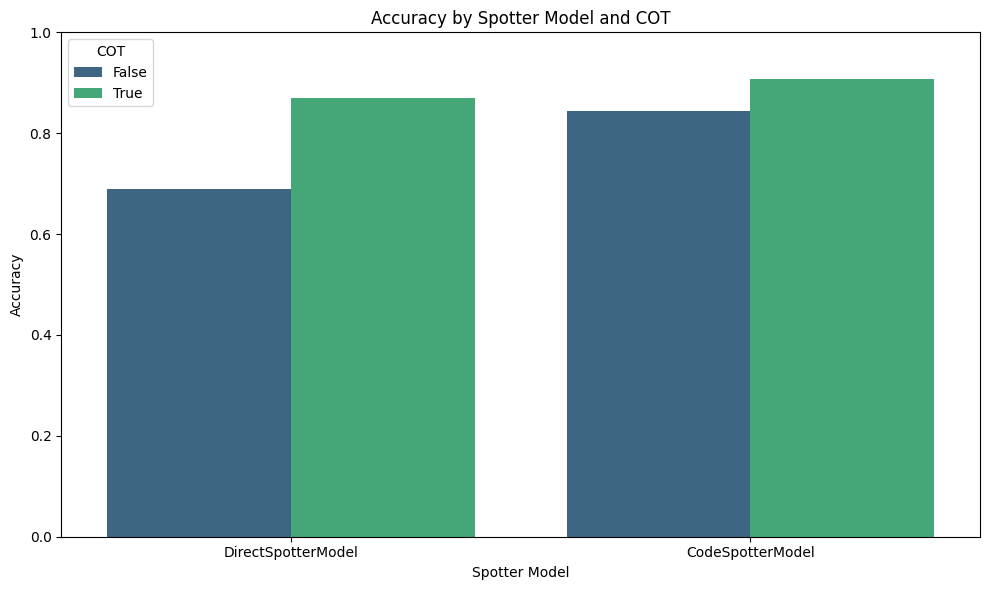

In [15]:
import seaborn as sns

# Create a bar plot to visualize the accuracy by spotter model and COT
plt.figure(figsize=(10, 6))
sns.barplot(
    data=results_df,
    x="spotter_model",
    y="accuracy",
    hue="cot",
    palette="viridis"
)

# Add labels and title
plt.title("Accuracy by Spotter Model and COT")
plt.xlabel("Spotter Model")
plt.ylabel("Accuracy")
plt.ylim((0,1))
plt.legend(title="COT")
plt.tight_layout()
plt.show()

KeyError: 'gpt-4o'

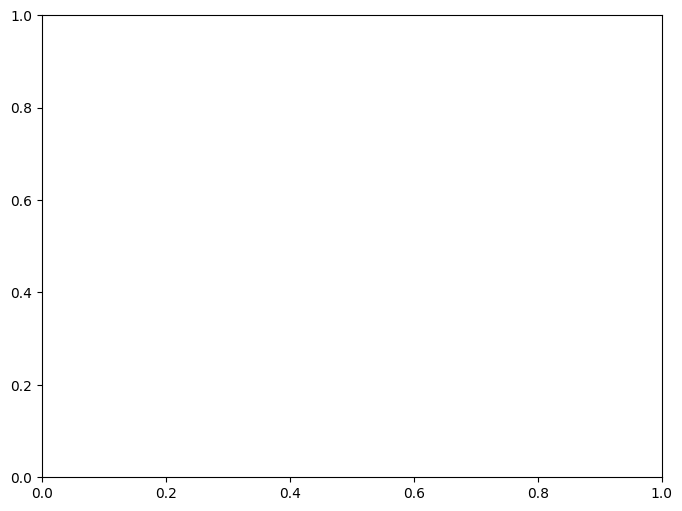

In [8]:
# Prepare data for the plot
labels = language_models
x = np.arange(len(labels))  # positions for language models on x-axis
width = 0.35  # width of each bar

fig, ax = plt.subplots(figsize=(8, 6))

# For each language model, the first element is for DirectSpotter and the second for CodeSpotterModel.
direct = [results[l][0] for l in labels]
code = [results[l][1] for l in labels]


rects1 = ax.bar(x - width/2, direct, width, label='DirectSpotter')
rects2 = ax.bar(x + width/2, code, width, label='CodeSpotterModel')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Language Model and Spotter Model')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

# Annotate bars with the accuracy values.
def autolabel(rects):
        for rect in rects:
                height = rect.get_height()
                ax.annotate(f'{height:.2f}',
                                        xy=(rect.get_x() + rect.get_width() / 2, height),
                                        xytext=(0, 3),  # vertical offset in points
                                        textcoords="offset points",
                                        ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()